### Genetic Algorithm
Solve Eight Queen problem using

In [121]:
import random as ran
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def crossover(parent1, parent2):
    point = ran.randint(1, len(parent1) - 1)
    child_chromosome = parent1[:point] + parent2[point:]
    seen = set()
    remaining = [i for i in range(len(parent1)) if i not in child_chromosome]
    final_child = []
    for gene in child_chromosome:
        if gene not in seen:
            final_child.append(gene)
            seen.add(gene)

    final_child.extend(remaining) # Add any missing numbers

    return final_child

# A more effective mutation for this problem
def mutate(child, mutation_rate=0.2):
    if ran.random() < mutation_rate:
        len_child = len(child)
        # Pick two random columns to swap
        idx1 = ran.randrange(len_child)
        idx2 = ran.randrange(len_child)

        # Swap the rows of the two selected columns
        child[idx1], child[idx2] = child[idx2], child[idx1]
    return child

def fitness(child):
    len_child = len(child)
    score = 0
    for col in range (len_child):
        row = child[col]
        for check_col in range(len_child):
            check_row = child[check_col]
            if row == check_row:
                continue
            if abs(row-check_row) == abs(col-check_col):
                continue
            score += 1
    return score

def new_child(parent1, parent2):
    len_parent = len(parent1)
    len_parent = len(parent2)
    child = crossover(parent1, parent2)
    child = mutate(child)
    child = (child,fitness(child))
    return child

def new_generation(parents, num_of_children = 50):
    new_population = []
    for _ in range(num_of_children):
        p1 , p2= ran.sample(parents, 2)
        child = new_child(p1, p2)
        new_population.append(child)
    return new_population

def genetic_algorithm(population):
    population = new_generation(population)
    population = sorted(population, key=lambda x: x[1], reverse=True)

    while(population[0][1] < 54):
        elite_size = int(len(population) * 0.4)
        next_generation = population[:elite_size]
        # Generate new children from the elite pool to fill the rest
        # This creates more variety than just breeding the top two
        children_to_create = len(population) - elite_size
        for _ in range(children_to_create):
            # Select two random parents from the elite group
            parent1 = ran.choice(next_generation)[0]
            parent2 = ran.choice(next_generation)[0]
            next_generation.append(new_child(parent1, parent2))

        population = next_generation
        print(f'current best fitness: {population[0][1]}')
    if population[0][1] == 54:
            print(f'Solution found with fitness: {population[0][1]}')
            print(population[0])
            visualize_board(population[0][0])
            return
    return population[0]



def visualize_board(chromosome):
    """Displays the final chessboard configuration."""
    n = len(chromosome)
    board = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = 1 # White squares

    plt.imshow(board, cmap='binary')

    for col, row in enumerate(chromosome):
        plt.text(col, row, '♛', fontsize=20, ha='center', va='center', color='red')

    plt.xticks([])
    plt.yticks([])
    plt.title("Final 8-Queens Solution")
    plt.show()



Solution found with fitness: 54
([4, 2, 7, 5, 1, 3, 6, 0], 54)


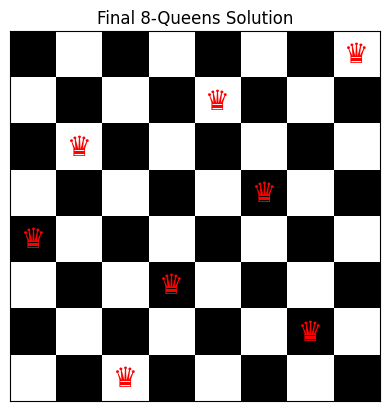

In [134]:
population1 = [0,4,7,5,1,3,6,2]
population2 = [1,3,0,4,6,2,5,7]
population3 = [2,0,4,7,1,3,5,6]

population = [population1, population2, population3]

genetic_algorithm(population)
# print(population)
# print(fitness(population1))










